<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Kathleen Daniella Wijaya"
KELAS = "B"
NPM = "2106637366"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Kathleen Daniella Wijaya dari kelas B dengan NPM 2106637366, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Kathleen Daniella Wijaya)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. **alm2**: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [3]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [77]:
# TODO: Open your dataset
df_ecoli = pd.read_csv("ecoli.csv")
df_ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [5]:
# TODO: Do the inspection on the dataset and preprocess it

# Handle missing values

def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

check_null(df_ecoli)

Tidak ditemukan missing value pada dataset


In [6]:
# Handle outliers

def check_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5 * IQR
  UB = Q3 + 1.5 * IQR
  outliers = (df < LB) | (df > UB)
  print(outliers.sum())

check_outlier(df_ecoli)

mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64


In [85]:
Q1 = df_ecoli['gvh'].quantile(0.25)
Q3 = df_ecoli['gvh'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_ecoli['gvh'] < LB) | (df_ecoli['gvh'] > UB)
df_ecoli = df_ecoli[~outliers]

In [79]:
Q1 = df_ecoli['lip'].quantile(0.25)
Q3 = df_ecoli['lip'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_ecoli['lip'] < LB) | (df_ecoli['lip'] > UB)
df_ecoli = df_ecoli[~outliers]

In [80]:
Q1 = df_ecoli['aac'].quantile(0.25)
Q3 = df_ecoli['aac'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_ecoli['aac'] < LB) | (df_ecoli['aac'] > UB)
df_ecoli = df_ecoli[~outliers]

In [81]:
Q1 = df_ecoli['chg'].quantile(0.25)
Q3 = df_ecoli['chg'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_ecoli['chg'] < LB) | (df_ecoli['chg'] > UB)
df_ecoli = df_ecoli[~outliers]

In [86]:
check_outlier(df_ecoli)

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64


In [87]:
# Standarisasi tidak perlu dilakukan karena setiap kolom sudah memiliki rentang nilai yang sama

df_ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


In [88]:
# Encoding tidak perlu dilakukan karena ecoli.csv tidak memiliki data bertipe kategorikal

df_ecoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     292 non-null    float64
 1   gvh     292 non-null    float64
 2   lip     292 non-null    float64
 3   chg     292 non-null    float64
 4   aac     292 non-null    float64
 5   alm1    292 non-null    float64
 6   alm2    292 non-null    float64
 7   class   292 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 20.5 KB


In [98]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = df_ecoli[['alm1', 'alm2']]
X

,alm1,alm2
0,0.24,0.35
1,0.35,0.44
2,0.37,0.46
3,0.45,0.36
4,0.25,0.35
...,...,...
331,0.68,0.30
332,0.35,0.32
333,0.39,0.38
334,0.42,0.37


## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.6873837881650879
For n_clusters = 3 The average silhouette_coefficient is : 0.5040337782934738
For n_clusters = 4 The average silhouette_coefficient is : 0.5244144993570033
For n_clusters = 5 The average silhouette_coefficient is : 0.4405284204629362
For n_clusters = 6 The average silhouette_coefficient is : 0.4589536735644067
For n_clusters = 7 The average silhouette_coefficient is : 0.4648326892735678
For n_clusters = 8 The average silhouette_coefficient is : 0.47541176839691457


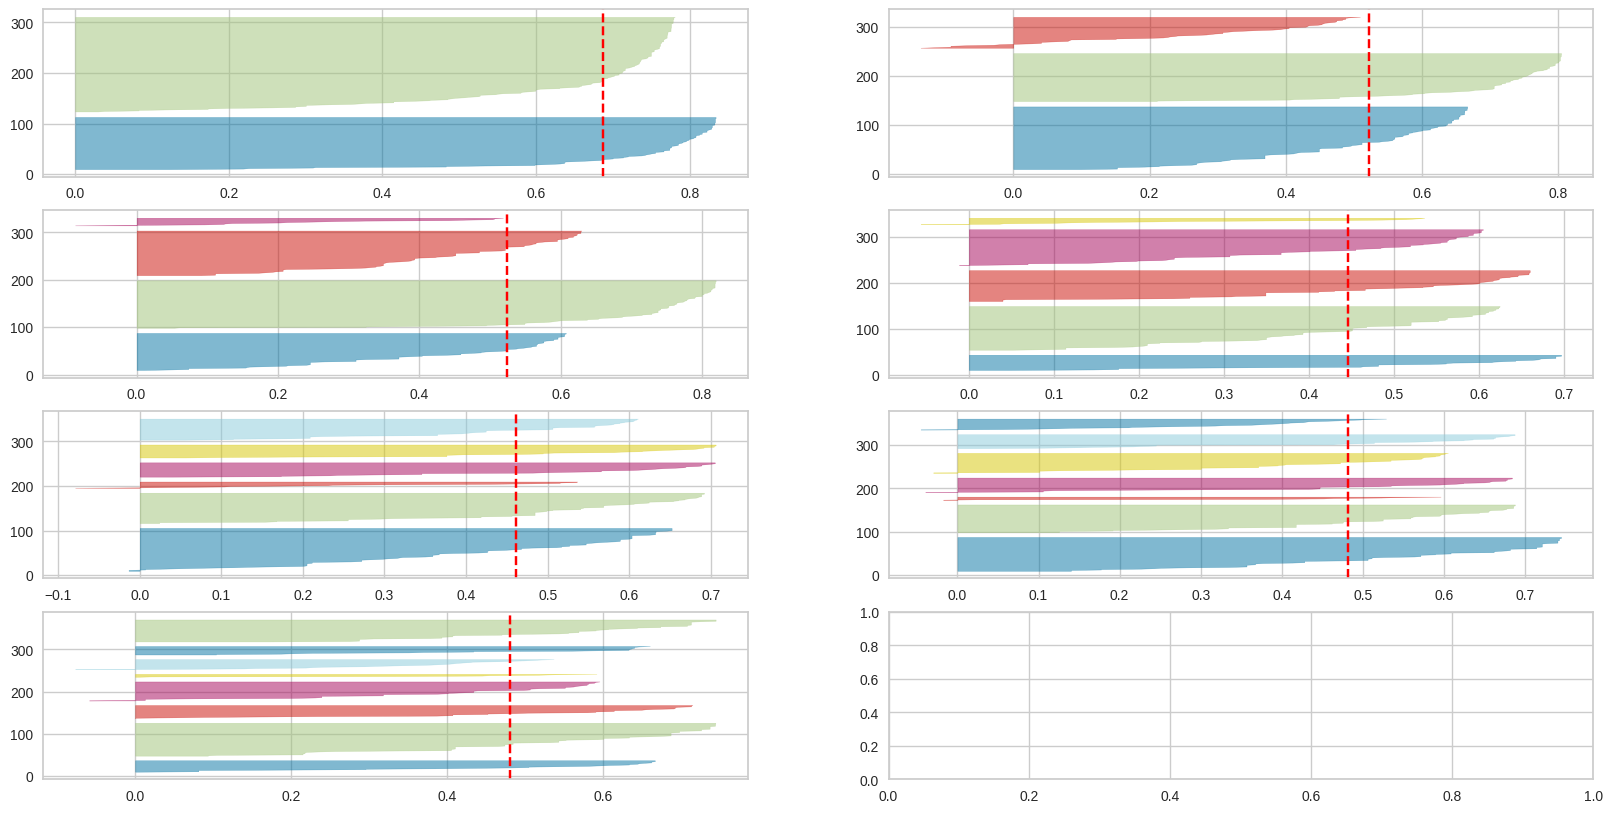

In [99]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [100]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=2)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('alm1', 'alm2'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alm1,alm2,Clusters
0,0.24,0.35,1
1,0.35,0.44,1
2,0.37,0.46,1
3,0.45,0.36,1
4,0.25,0.35,1
...,...,...,...
331,0.68,0.30,1
332,0.35,0.32,1
333,0.39,0.38,1
334,0.42,0.37,1


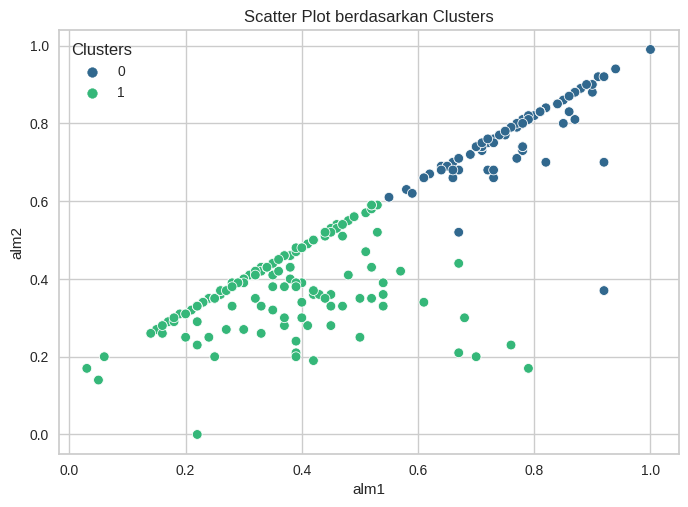

In [101]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
sns.scatterplot(x='alm1', y='alm2', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('Scatter Plot berdasarkan Clusters')
plt.show()

## Hierarchical Clustering [35]

In [102]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [107]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([291, 290, 289, 287, 288, 143, 286, 285, 201, 281, 280, 169, 215,
       223, 278, 277, 279, 157, 275, 274, 271, 175, 251, 197, 144, 246,
       233, 200, 225, 268, 242, 247, 241, 156, 226, 256, 253, 204, 161,
       166, 261, 218, 151, 142, 220, 147, 146,  71, 236, 167, 267, 138,
       148, 257, 245, 230, 244, 252, 282, 165, 262, 216, 276, 235, 284,
       243, 254, 189, 221, 150, 133, 137, 231, 260, 266, 265, 153, 259,
       228, 240, 263, 163, 224, 164, 283, 168, 237, 270, 239, 191, 173,
       122, 258, 121, 250, 129, 249, 111, 264, 124, 203, 141, 149, 232,
       219,  60, 125, 171, 126, 186, 207, 205, 273, 119, 248, 185,  83,
       109,  73, 269, 154, 255, 238, 227, 272, 118, 130, 217,  64, 123,
       229, 128, 112, 115, 145, 139, 135,  62, 222, 234, 131,  55, 107,
       210, 209, 195, 208, 103, 206, 152, 214, 101,  70, 140, 160, 102,
        81, 196, 104, 108, 136, 194, 198, 192, 202,  95, 134, 199, 190,
       117,  97, 188, 187, 170, 213, 212,  51, 159,  66, 113, 15

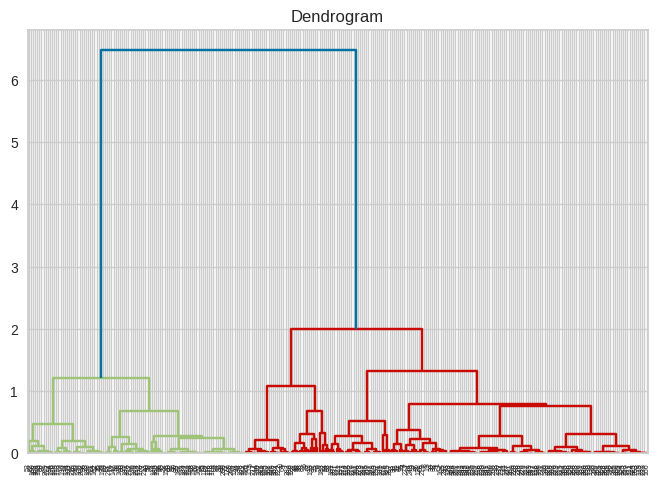

In [105]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.

plot_dendrogram(model, labels=clustering.labels_)
plt.title('Dendrogram')
plt.show()

In [108]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,alm1,alm2,Clusters,Agg_clusters
0,0.24,0.35,1,0
1,0.35,0.44,1,0
2,0.37,0.46,1,0
3,0.45,0.36,1,0
4,0.25,0.35,1,0
...,...,...,...,...
331,0.68,0.30,1,0
332,0.35,0.32,1,0
333,0.39,0.38,1,0
334,0.42,0.37,1,0


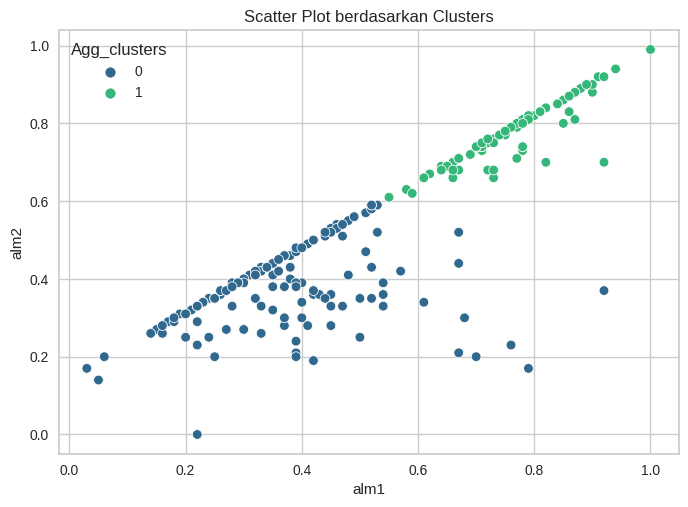

In [109]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
sns.scatterplot(x='alm1', y='alm2', hue='Agg_clusters', data=data_with_clusters, palette='viridis')
plt.title('Scatter Plot berdasarkan Clusters')
plt.show()

# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

> Dengan memilih atribut 'alm1' dan 'alm2', didapatkan 2 kelompok ecoli.
> * Kelompok pertama (0) terdiri dari mayoritas ecoli yang memiliki skor program prediksi wilayah rentang membran ALOM (alm1) yang tinggi dan skor program ALOM setelah mengecualikan daerah sinyal yang diduga dapat dibelah dari urutannya (alm2) yang tinggi.
> * Kelompok kedua (1) terdiri dari mayoritas ecoli yang memiliki skor program prediksi wilayah rentang membran ALOM (alm1) yang rendah dan skor program ALOM setelah mengecualikan daerah sinyal yang diduga dapat dibelah dari urutannya (alm2) yang rendah.

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

> Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
> * DBSCAN adalah algoritma clustering density-based yang cocok digunakan untuk menemukan outliner dalam dataset. Algoritma ini dapat menemukan klaster berbentuk sembarang dengan cara memisahkan wilayah-wilayah dengan daerah-daerah berkerapatan rendah sehingga dapat mendeteksi pencilan di antara klaster berkerapatan tinggi. DBSCAN menggunakan dua parameter untuk menentukan bagaimana klaster didefinisikan, yaitu minPts (jumlah minimum titik data yang perlu dikelompokkan bersama untuk suatu wilayah dianggap berkerapatan tinggi) dan eps (jarak yang digunakan untuk menentukan apakah suatu titik data berada di wilayah yang sama dengan titik data lainnya).

> Balance Iterative Reducing and Clustering using Hierarchies (BIRCH)
> * Algoritma BIRCH bekerja lebih baik pada dataset besar dibandingkan dengan algoritma k-means. BIRCH memecah data menjadi ringkasan kecil yang dikelompokkan. Ringkasan ini menyimpan sebanyak mungkin informasi distribusi tentang titik data. Algoritma ini umumnya digunakan dengan algoritma clustering lain karena teknik clustering lain dapat digunakan pada ringkasan yang dihasilkan oleh BIRCH. Kekurangan utama dari BIRCH adalah bahwa algoritma ini hanya berfungsi pada nilai data numerik.

> Affinity Propagation
> * Pada algoritma Affinity Propagation, setiap titik data berkomunikasi dengan semua titik data lain untuk memberi tahu seberapa mirip mereka. Saat pesan dikirim antara titik data, dataset yang disebut sebagai exemplar akan ditemukan. Exemplar ini akan membentuk konsensus tentang titik data mana yang paling baik untuk mewakili suatu klaster. Maka dari itu, algoritma ini cocok digunakan ketika jumlah klaster yang diekspektasi belum diketahui.

> Mean-Shift
> * Algoritma ini adalah hierarchical custering algorithm, akan tetapi tidak cocok digunakan untuk dataset yang besar. Mean-shift bekerja dengan melakukan iterasi pada seluruh titik data dan men-shift titik data tersebut menuju modus. Dalam konteks ini, modus adalah area titik data yang memiliki kerapatan tinggi di suatu wilayah. Proses iterasi ini dilakukan pada setiap titik data sampai semua titik data telah ditempatkan ke dalam suatu klaster.

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

> Silhouette Score
> * Silhouette Score mengukur seberapa dekat setiap titik data dalam suatu klaster dengan klaster lainnya. Rentang nilai Silhouette Score berada antara -1 hingga 1. Skor yang lebih tinggi menunjukkan bahwa titik data lebih baik sesuai dengan klasternya sendiri dan berjauhan dengan klaster lainnya.

> Davies-Bouldin Index
> * Davies-Bouldin Index mengukur seberapa baik sebuah klaster terdefinisi dengan menghitung rata-rata dari rasio kerapatan antar klaster. Nilai yang lebih rendah menunjukkan pembentukan klaster yang lebih baik.

> Calinski-Harabasz Index
> * Calinski-Harabasz Index, yang juga dikenal sebagai Variance Ratio Criterion, didefinisikan sebagai rasio antara dispersi dalam klaster dan dispersi antar klaster. Indeks ini adalah cara yang baik untuk mengevaluasi kinerja algoritma clustering karena tidak memerlukan informasi tentang label ground truth. Semakin tinggi indeksnya, semakin baik kinerjanya.

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

> Intra-cluster similarity mengukur sejauh mana data di dalam suatu klaster mirip satu sama lain. Hal ini dapat dihitung dengan rata-rata *euclidian distance* dari masing-masing titik data ke centroid. Sementara itu, inter-cluster dissimilarity mengukur sejauh mana klaster berbeda satu sama lain. Hal ini dapat dihitung dengan rata-rata *euclidian distance* yang paling kecil (minimum) antara dua klaster yang berbeda. Suatu klaster dapat dianggap baik apabila kedua nilai intra-class similarity dan nilai inter-class dissimilarity tinggi. Dengan kata lain, klaster yang baik memiliki kelompok data yang kompak di dalamnya dan berbeda secara signifikan dari kelompok data lain.

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

> Dataset dapat memiliki sejumlah pola yang dapat diinterpretasikan secara visual. Tugas algoritma clustering adalah untuk dapat menangkap informasi ini. Algoritma K-Means sendiri mengasumsikan bahwa klaster memiliki bentuk globular dan ukuran yang seragam. Oleh karena itu, algoritma ini cenderung menghasilkan hasil yang kurang memuaskan pada data pengelompokan yang tidak sesuai dengan asumsi tersebut. Selain itu, K-Means  menggunakan perhitungan jarak Euclidean untuk mengelompokkan suatu data berdasarkan jaraknya ke centroid. Maka dari itu, suatu data akan dikelompokkan ke dalam klaster A apabila jaraknya lebih dekat ke centroid klaster A, meskipun sebenarnya termasuk ke dalam klaster B.

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_

Referensi:
* https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/
* https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
* https://towardsdatascience.com/a-practical-guide-on-k-means-clustering-ca3bef3c853d